In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error
sb.set() 

In [2]:
data=pd.read_csv("train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Problem 1 : Predicting SalePrice using GrLivArea
Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71.
In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.

In [3]:
gla=pd.DataFrame(data["GrLivArea"])
sp=pd.DataFrame(data["SalePrice"])

# a
Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train
set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

In [4]:
lr=LinearRegression()
xtr,xte,ytr,yte=tts(gla,sp,test_size = 0.2)

coefficients are 107.87122918973455 17559.38083043904


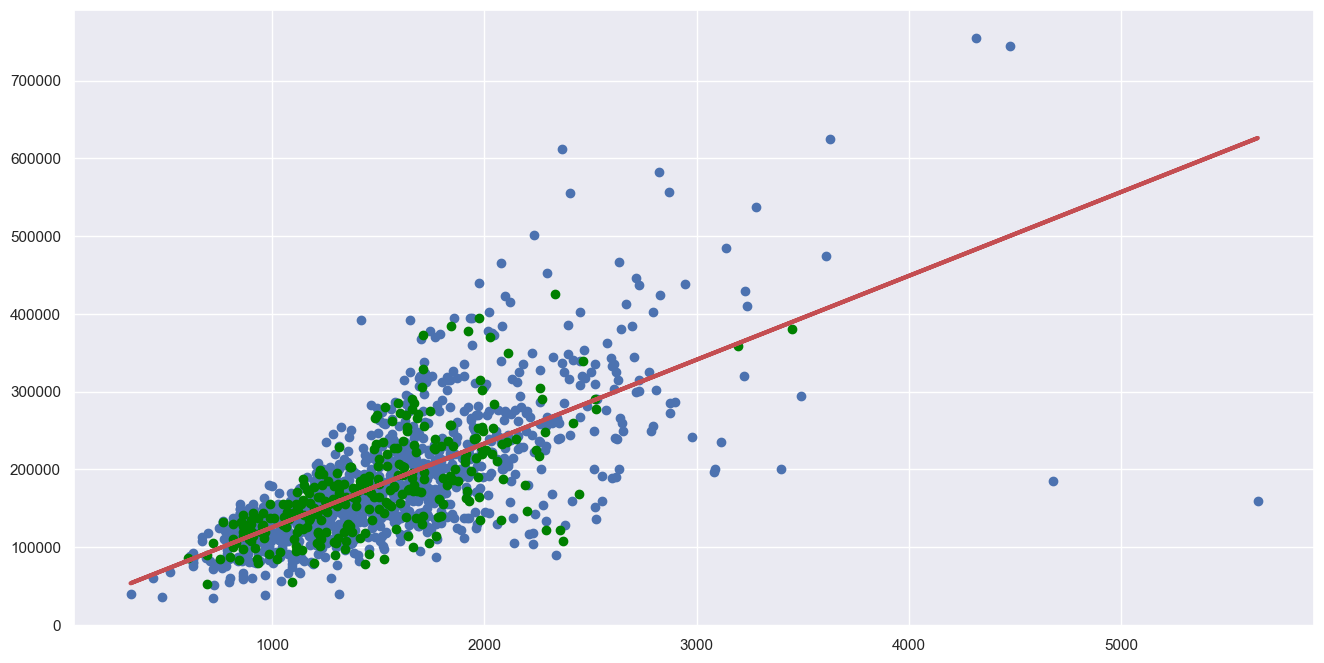

In [5]:
lr.fit(xtr,ytr)
rlx=xtr
rly=lr.intercept_ + lr.coef_ * xtr
print("coefficients are",lr.coef_[0][0],lr.intercept_[0])
f = plt.figure(figsize=(16, 8))
plt.scatter(xtr,ytr)
plt.plot(rlx, rly, 'r-', linewidth = 3)
plt.scatter(xte,yte,color="green")
plt.show()

# b
Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

In [6]:
yptr=lr.predict(xtr)
ypte=lr.predict(xte)

In [7]:
def mse(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))
def se(actual, predicted):
    return np.sqrt(len(actual) * mse(actual, predicted)/(len(actual) - 2))

In [8]:
msetr=mse(ytr,yptr)
msete=mse(yte,ypte)

print("Train Set")
print("MSE",msetr)
print("Explained Variance",lr.score(xtr,ytr))
print("Test Set")
print("Mean Squared Error",msete)
print("Explained Variance",lr.score(xte,yte))

Train Set
MSE 3316421979.899571
Explained Variance 0.5109061734304297
Test Set
Mean Squared Error 2434349409.009376
Explained Variance 0.4457168006789347


In [9]:
def lr4sp(x,y):
    xtr,xte,ytr,yte=tts(x,y,test_size = 0.2)
    lr.fit(xtr,ytr)
    rlx=xtr
    rly=lr.intercept_ + lr.coef_ * xtr
    print(lr.coef_[0])
    f = plt.figure(figsize=(16, 8))
    plt.scatter(xtr,ytr)
    plt.plot(rlx, rly, 'r-', linewidth = 3)
    plt.scatter(xte,yte,color="green")
    plt.show()
    yptr=lr.predict(xtr)
    ypte=lr.predict(xte)
    msetr=mse(ytr,yptr)
    msete=mse(yte,ypte)
    print(x.columns.values[0])
    print("Train Set")
    print("Mean Squared Error",msetr)
    print("Variance",lr.score(xtr,ytr))
    print("Test Set")
    print("Mean Squared Error",msete)
    print("Explained Variance",lr.score(xte,yte))

[121.00319054]


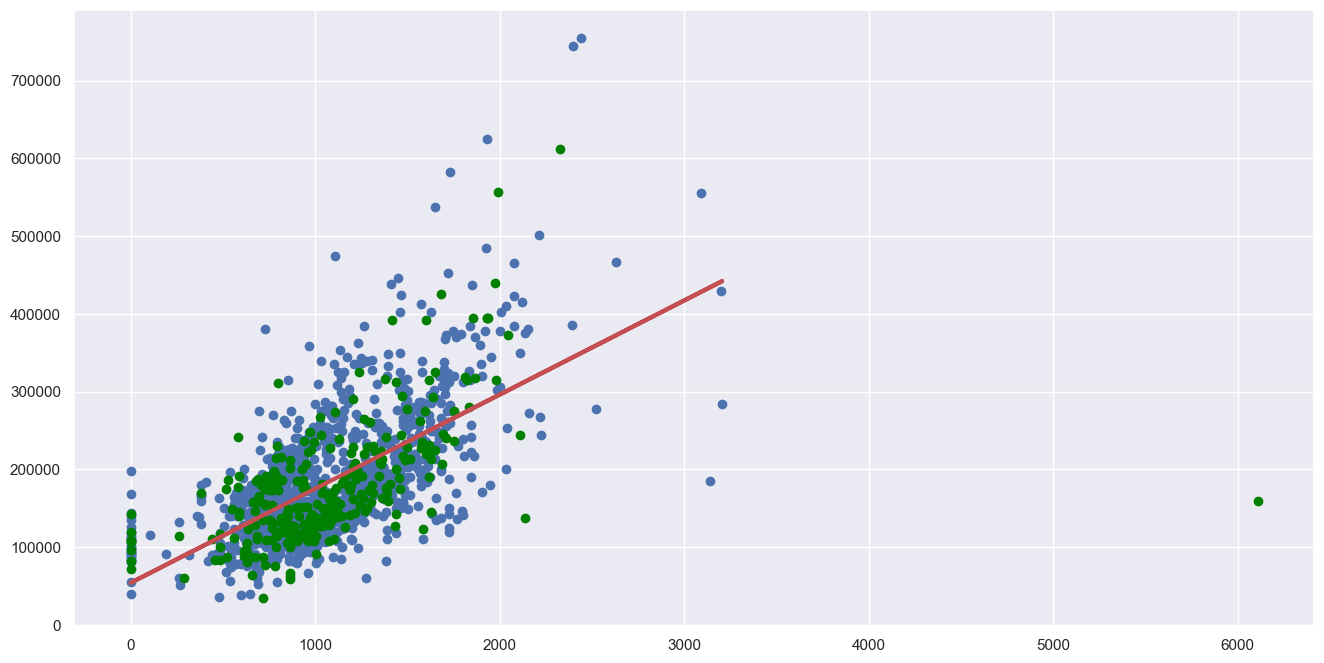

TotalBsmtSF
Train Set
Mean Squared Error 3801929047.920447
Variance 0.40465036761784345
Test Set
Mean Squared Error 4554825193.968587
Explained Variance 0.23579271641635535


In [10]:
tbsf=pd.DataFrame(data["TotalBsmtSF"])
lr4sp(tbsf,sp)

[237.88399534]


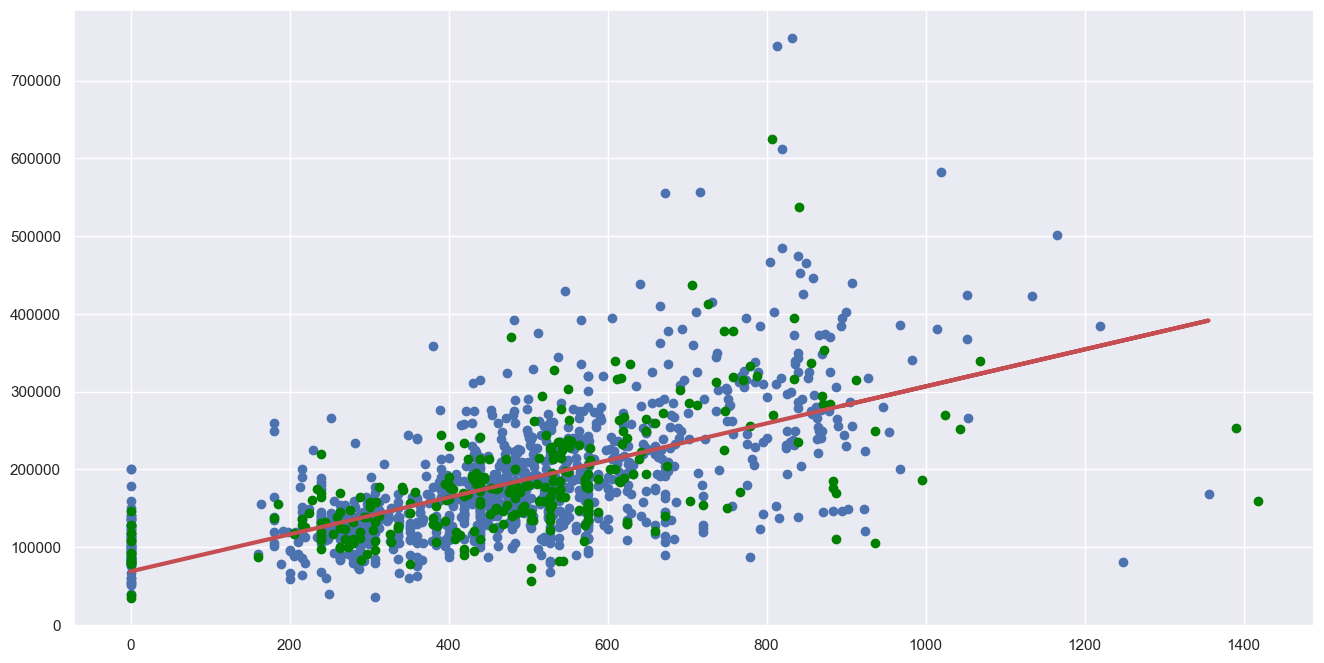

GarageArea
Train Set
Mean Squared Error 3870576102.2522483
Variance 0.39661996564948543
Test Set
Mean Squared Error 3805321076.9661365
Explained Variance 0.3516891378792585


In [11]:
ga=pd.DataFrame(data["GarageArea"])
lr4sp(ga,sp)

[101.37041235]


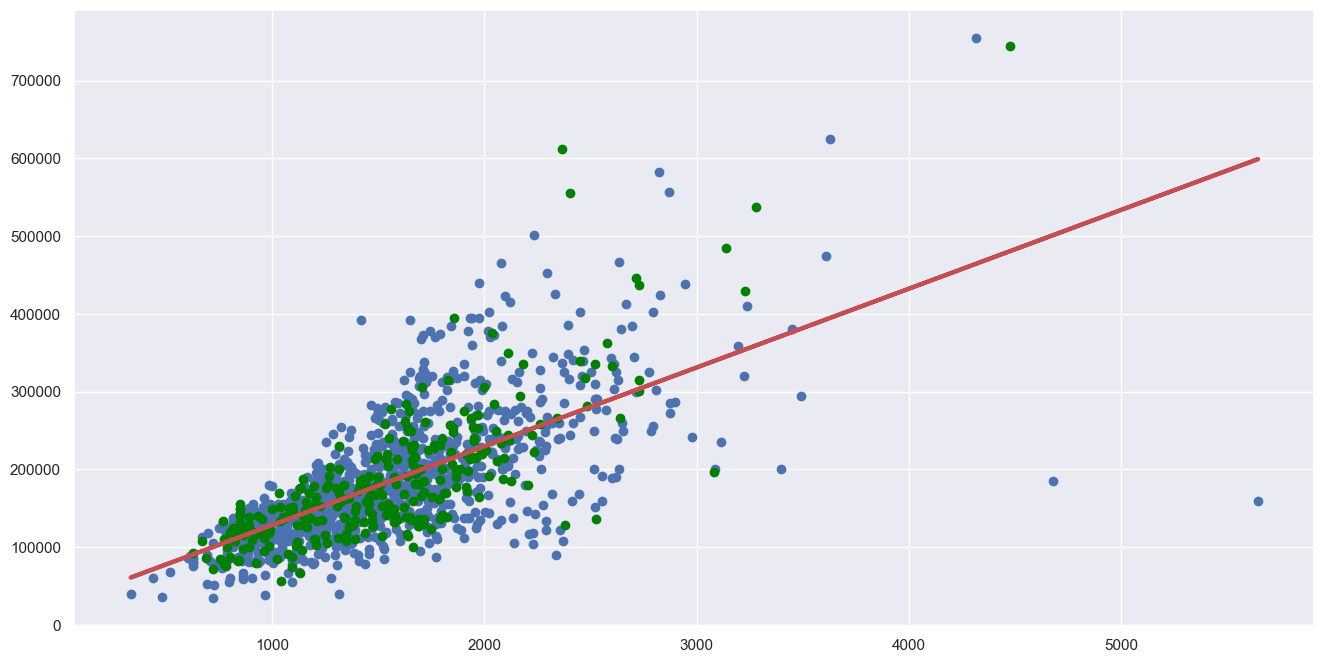

GrLivArea
Train Set
Mean Squared Error 3183816335.804818
Variance 0.4711560811776231
Test Set
Mean Squared Error 3010165729.064729
Explained Variance 0.5954902748981158
[105.19638372]


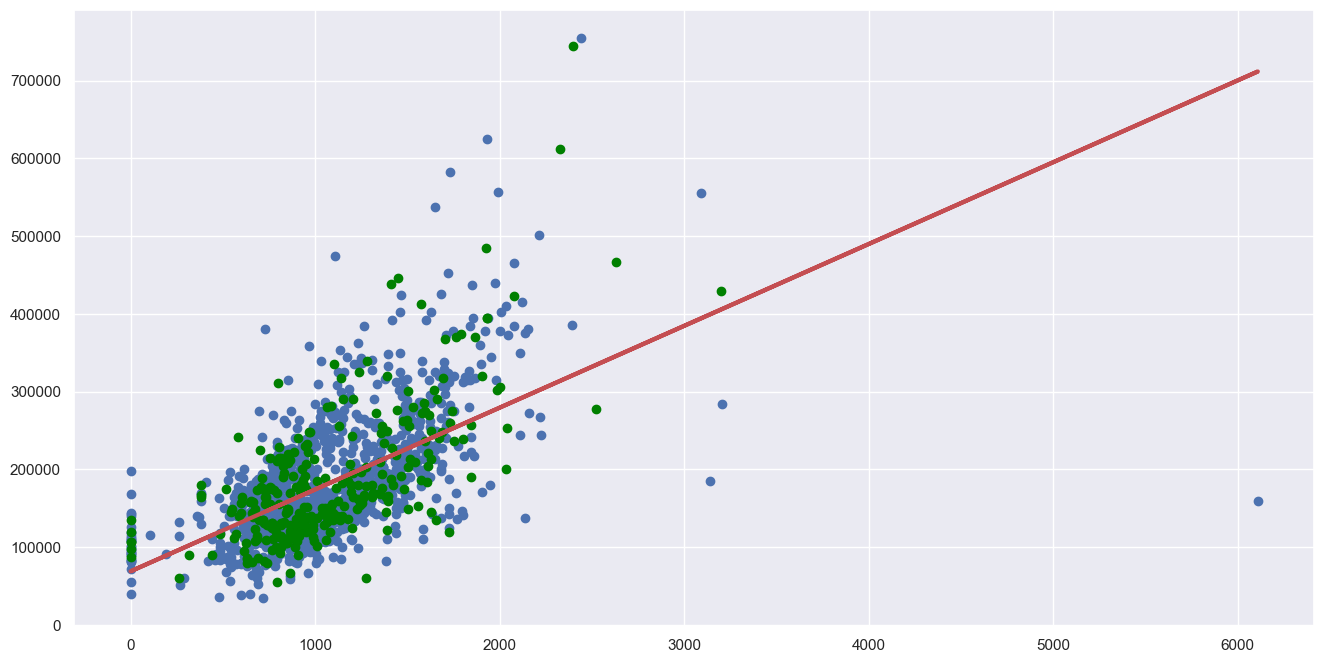

TotalBsmtSF
Train Set
Mean Squared Error 3865308273.6860604
Variance 0.35204210769902144
Test Set
Mean Squared Error 4237109845.314388
Explained Variance 0.44490283276402165
[235.34270533]


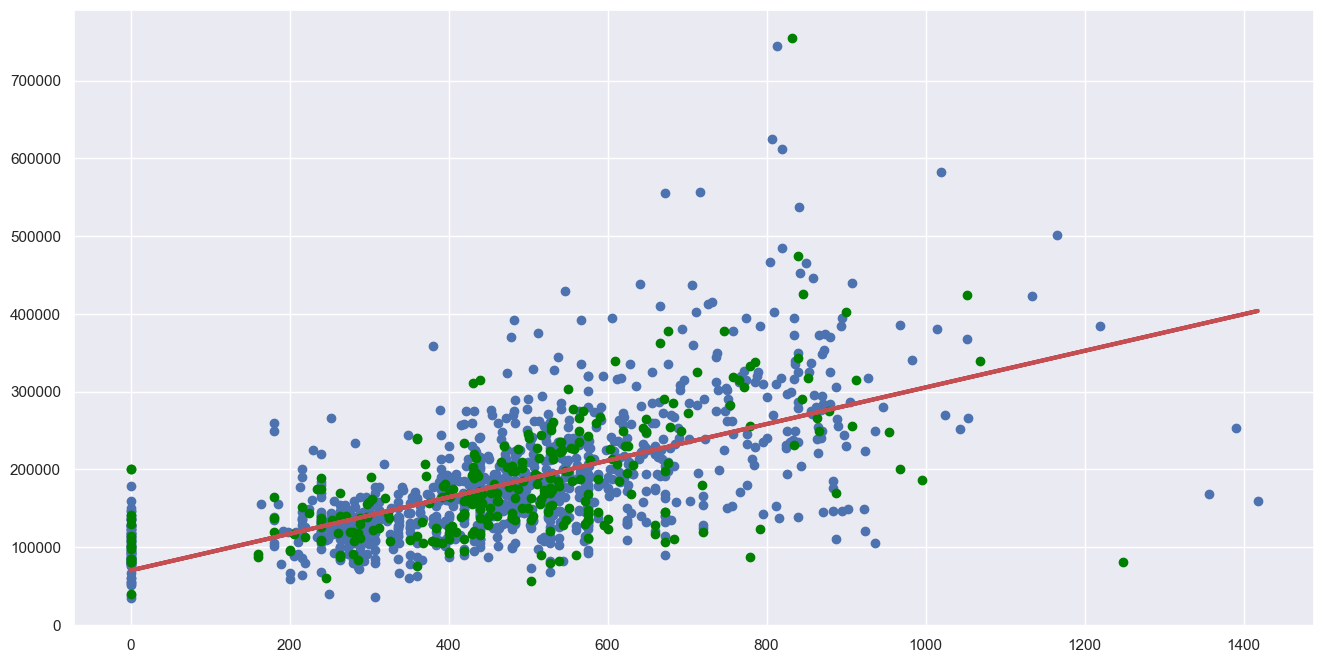

GarageArea
Train Set
Mean Squared Error 3783709172.0137897
Variance 0.40278108531974544
Test Set
Mean Squared Error 4147130513.3600507
Explained Variance 0.330130581163681


In [12]:
lr4sp(gla,sp)
lr4sp(tbsf,sp)
lr4sp(ga,sp)

`GrLivArea` has lower `Mean Squared Error` and Higher `Explained Variance` than the other 2 factors.

So, it is the best model.

# Problem 3 : Refining the Models to Predict SalePrice
In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.

# a
Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea
UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

In [13]:
dt=data[["GrLivArea","SalePrice"]]

In [14]:
mg=np.mean(np.array(ga))
ms=np.mean(np.array(sp))

In [15]:
seg=np.mean(np.array(ga))
ses=np.mean(np.array(sp))

In [16]:
dt1=dt[(abs(dt["GrLivArea"]-mg)<=2.58*seg)&(abs(dt["SalePrice"]-ms)<=2.58*ses)]
dt1

,GrLivArea,SalePrice
1,1262,181500
5,1362,143000
9,1077,118000
10,1040,129500
12,912,144000
...,...,...
1453,1140,84500
1454,1221,185000
1455,1647,175000
1458,1078,142125


# b
In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on
the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

# c
Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

[108.33431583]


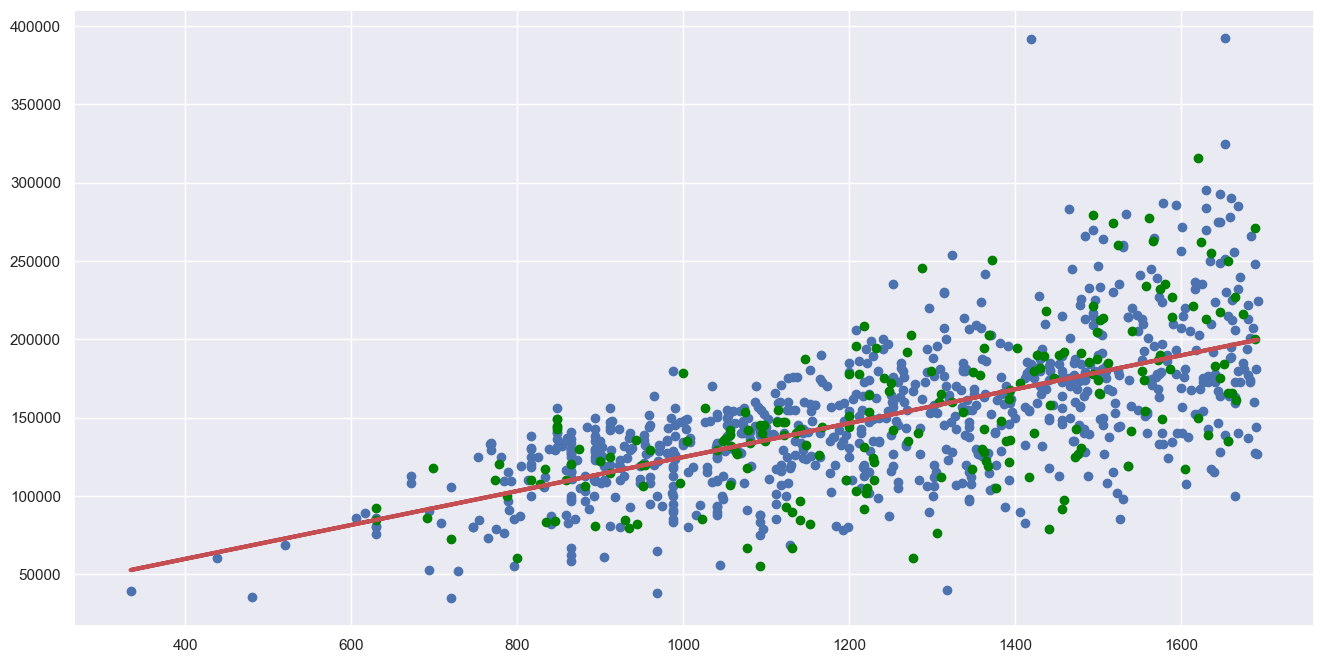

GrLivArea
Train Set
Mean Squared Error 1256059719.659414
Variance 0.41639276966353955
Test Set
Mean Squared Error 1457055388.22866
Explained Variance 0.39767050284145466


In [17]:
lr4sp(pd.DataFrame(dt1["GrLivArea"]),pd.DataFrame(dt1["SalePrice"]))

This model has much lower `Mean Squared Error` than 3 models in Problem 2.